## Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
config = {
    'train': '/content/drive/MyDrive/data/train.json',
    'dev': '/content/drive/MyDrive/data/dev.json',
    'test': '/content/drive/MyDrive/data/test.json'
}

In [ ]:
import pandas as pd
train_data = pd.read_json(config['train'], lines=True, chunksize = 1000)
dev_data = pd.read_json(config['dev'], lines=True, chunksize = 1000)
test_data = pd.read_json(config['test'], lines=True, chunksize = 1000)

In [ ]:
train_data = pd.concat([i for i in train_data])
dev_data = pd.concat([i for i in dev_data])
test_data = pd.concat([i for i in test_data])
train_data = pd.concat([train_data, dev_data])

In [ ]:
train_data.shape

(63360, 4)

In [ ]:
test_data.shape

(10000, 3)

In [ ]:
train_data.head(10)

,label,label_desc,sentence,keywords
0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？,
1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告,"商赢环球股份有限公司,年度报告,商赢环球,赢环球股份有限公司,事后审核问询函,上海证券交易所"
2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？,
3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？,"莫斯科,贝加尔湖,世界杯,俄罗斯,Hour"
4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发,"剃须刀,绝地求生,定制版,战狼2,红海行动,天猫定制版三防,雷明登,维克托"
5,103,news_sports,再次证明了“无敌是多么寂寞”——逆天的中国乒乓球队！,"世乒赛,张怡宁,许昕,兵乓球,乒乓球"
6,109,news_tech,三农盾SACC-全球首个推出：互联网+区块链+农产品的电商平台,"湖南省,区块链,物联网,集中化,SACC三农盾"
7,116,news_game,重做or新英雄？其实重做对暴雪来说同样重要,"暴雪,重做,新英雄,黑百合,英雄联盟"
8,103,news_sports,如何在商业活动中不受人欺骗？,
9,101,news_culture,87版红楼梦最温柔的四个丫鬟，娶谁都是一生的福气,"欧阳奋强,贾宝玉,花袭人,红楼梦,平儿"


In [ ]:
test_data.head(10)

,id,sentence,keywords
0,0,A股：2个细分领域龙头个股值得股民关注,
1,1,买套房不香吗？为什么会有人愿花600万买部手机？,
2,2,1000多家房地产公司转行养猪？你看到的仅仅是表面,
3,3,【指数短线破位后的思路梳理】,
4,4,在“慢”的过程中积攒“快”的爆发力,
5,5,出差32次、飞行40704公里，我看到了中国最真实的贫困,
6,6,三季度GDP增长4.9%，前三季度经济增长由负转正,
7,7,邓华：改变毛泽东军令打天津，识破美军仁川登陆，彭德怀赞好帮手,
8,8,号称今年最后一片银杏叶？大雪节气的高岭宿集，古村尽带黄金甲,
9,9,潮汕人经商有什么秘诀？,


In [ ]:
train_data.label.value_counts(normalize=True, ascending=False)

109    0.111174
104    0.097159
102    0.092898
113    0.090846
107    0.077478
101    0.076026
103    0.075095
110    0.068624
108    0.064441
112    0.064094
116    0.063905
115    0.053346
106    0.039220
100    0.020928
114    0.004766
Name: label, dtype: float64

In [ ]:
train_data['sentence_len']=train_data.sentence.apply(len)

In [ ]:
train_data.head(10)

,label,label_desc,sentence,keywords,sentence_len
0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？,,44
1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告,"商赢环球股份有限公司,年度报告,商赢环球,赢环球股份有限公司,事后审核问询函,上海证券交易所",46
2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？,,32
3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？,"莫斯科,贝加尔湖,世界杯,俄罗斯,Hour",19
4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发,"剃须刀,绝地求生,定制版,战狼2,红海行动,天猫定制版三防,雷明登,维克托",21
5,103,news_sports,再次证明了“无敌是多么寂寞”——逆天的中国乒乓球队！,"世乒赛,张怡宁,许昕,兵乓球,乒乓球",26
6,109,news_tech,三农盾SACC-全球首个推出：互联网+区块链+农产品的电商平台,"湖南省,区块链,物联网,集中化,SACC三农盾",31
7,116,news_game,重做or新英雄？其实重做对暴雪来说同样重要,"暴雪,重做,新英雄,黑百合,英雄联盟",21
8,103,news_sports,如何在商业活动中不受人欺骗？,,14
9,101,news_culture,87版红楼梦最温柔的四个丫鬟，娶谁都是一生的福气,"欧阳奋强,贾宝玉,花袭人,红楼梦,平儿",24


In [ ]:
np.max(train_data.sentence_len)

145

(array([2.500e+01, 3.400e+02, 1.989e+03, 2.706e+03, 3.752e+03, 6.808e+03,
        5.275e+03, 8.114e+03, 5.609e+03, 5.767e+03, 8.882e+03, 8.121e+03,
        2.868e+03, 1.527e+03, 5.310e+02, 6.180e+02, 1.730e+02, 1.310e+02,
        5.300e+01, 3.000e+01, 2.100e+01, 7.000e+00, 3.000e+00, 6.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  2.        ,   4.38333333,   6.76666667,   9.15      ,
         11.53333333,  13.91666667,  16.3       ,  18.68333333,
         21.06666667,  23.45      ,  25.83333333,  28.21666667,
         30.6       ,  32.98333333,  35.36666667,  37.75      ,
  

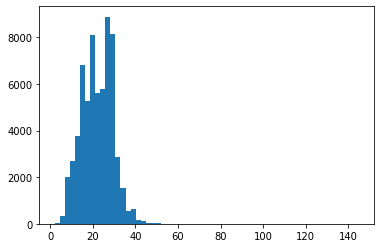

In [ ]:
plt.hist(train_data.sentence_len, bins=60)

In [ ]:
np.mean(train_data.sentence_len)

22.143497474747473

In [ ]:
np.std(train_data.sentence_len)

7.317046006594196

In [ ]:
max_len = int(np.mean(train_data.sentence_len)+1.5*np.std(train_data.sentence_len))
max_len

33

In [ ]:
len(np.where(train_data['sentence_len'] < max_len)[0])/len(train_data)
# sum(np.where(train_data.sentence_len < max_len,1,0))/len(train_data)

0.951010101010101

In [ ]:
train_data.drop(columns=['keywords'], inplace=True)
test_data.drop(columns=['keywords'], inplace=True)

## Data Processing

In [ ]:
import jieba

In [ ]:
def cut(string): return list(jieba.cut(string))

In [ ]:
train_data['words'] = train_data['sentence'].apply(lambda x: ' '.join(cut(x)))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.978 seconds.
Prefix dict has been built successfully.


In [ ]:
train_data['words_len'] = train_data['words'].apply(lambda x: len(x.split()))

In [ ]:
train_data.head(10)

,label,label_desc,sentence,sentence_len,words,words_len
0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？,44,上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让...,26
1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告,46,商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报...,20
2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？,32,通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎...,21
3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？,19,2018 年 去 俄罗斯 看 世界杯 得花 多少 钱 ？,10
4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发,21,剃须刀 的 个性 革新 ， 雷明登 天猫 定制 版 新品 首发,11
5,103,news_sports,再次证明了“无敌是多么寂寞”——逆天的中国乒乓球队！,26,再次 证明 了 “ 无敌 是 多么 寂寞 ” — — 逆天 的 中国乒乓球队 ！,15
6,109,news_tech,三农盾SACC-全球首个推出：互联网+区块链+农产品的电商平台,31,三农 盾 SACC - 全球 首个 推出 ： 互联网 + 区块 链 + 农产品 的 电商 平台,17
7,116,news_game,重做or新英雄？其实重做对暴雪来说同样重要,21,重做 or 新 英雄 ？ 其实 重做 对 暴雪 来说 同样 重要,12
8,103,news_sports,如何在商业活动中不受人欺骗？,14,如何 在 商业活动 中不受 人 欺骗 ？,7
9,101,news_culture,87版红楼梦最温柔的四个丫鬟，娶谁都是一生的福气,24,87 版 红楼梦 最 温柔 的 四个 丫鬟 ， 娶 谁 都 是 一生 的 福气,16


In [ ]:
np.mean(train_data['words_len'])

12.770722853535354

In [ ]:
np.std(train_data['words_len'])

4.536945507785195

In [ ]:
n = int(np.mean(train_data['words_len'])+1.5*np.std(train_data['words_len']))
n

19

In [ ]:
int(np.mean(train_data['words_len'])+1.5*np.std(train_data['words_len']))

In [ ]:
len(np.where(train_data['words_len'] <= 20)[0])/len(train_data)

0.9621369949494949

(array([7.100e+01, 3.400e+02, 7.930e+02, 4.019e+03, 3.269e+03, 3.815e+03,
        8.922e+03, 4.918e+03, 4.794e+03, 9.337e+03, 4.440e+03, 4.501e+03,
        7.679e+03, 2.479e+03, 1.584e+03, 1.452e+03, 2.920e+02, 2.020e+02,
        3.100e+02, 4.400e+01, 4.000e+01, 3.500e+01, 1.000e+01, 5.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  2.33333333,  3.66666667,  5.        ,  6.33333333,
         7.66666667,  9.        , 10.33333333, 11.66666667, 13.        ,
        14.33333333, 15.66666667, 17.        , 18.33333333, 19.66666667,
        21.        , 22.33333333, 23.66

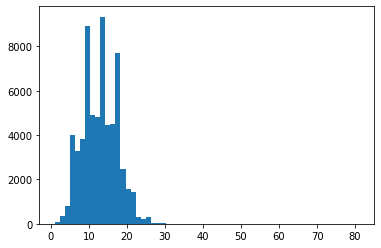

In [ ]:
plt.hist(train_data['words_len'], bins=60)

In [ ]:
train_data['words_keep'] = train_data['words'].apply(lambda x: ' '.join(x.split()[:20]))

In [ ]:
train_data.head(10)

,label,label_desc,sentence,sentence_len,words,words_len,words_keep
0,108,news_edu,上课时学生手机响个不停，老师一怒之下把手机摔了，家长拿发票让老师赔，大家怎么看待这种事？,44,上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让...,26,上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让...
1,104,news_finance,商赢环球股份有限公司关于延期回复上海证券交易所对公司2017年年度报告的事后审核问询函的公告,46,商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报...,20,商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报...
2,106,news_house,通过中介公司买了二手房，首付都付了，现在卖家不想卖了。怎么处理？,32,通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎...,21,通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎...
3,112,news_travel,2018年去俄罗斯看世界杯得花多少钱？,19,2018 年 去 俄罗斯 看 世界杯 得花 多少 钱 ？,10,2018 年 去 俄罗斯 看 世界杯 得花 多少 钱 ？
4,109,news_tech,剃须刀的个性革新，雷明登天猫定制版新品首发,21,剃须刀 的 个性 革新 ， 雷明登 天猫 定制 版 新品 首发,11,剃须刀 的 个性 革新 ， 雷明登 天猫 定制 版 新品 首发
5,103,news_sports,再次证明了“无敌是多么寂寞”——逆天的中国乒乓球队！,26,再次 证明 了 “ 无敌 是 多么 寂寞 ” — — 逆天 的 中国乒乓球队 ！,15,再次 证明 了 “ 无敌 是 多么 寂寞 ” — — 逆天 的 中国乒乓球队 ！
6,109,news_tech,三农盾SACC-全球首个推出：互联网+区块链+农产品的电商平台,31,三农 盾 SACC - 全球 首个 推出 ： 互联网 + 区块 链 + 农产品 的 电商 平台,17,三农 盾 SACC - 全球 首个 推出 ： 互联网 + 区块 链 + 农产品 的 电商 平台
7,116,news_game,重做or新英雄？其实重做对暴雪来说同样重要,21,重做 or 新 英雄 ？ 其实 重做 对 暴雪 来说 同样 重要,12,重做 or 新 英雄 ？ 其实 重做 对 暴雪 来说 同样 重要
8,103,news_sports,如何在商业活动中不受人欺骗？,14,如何 在 商业活动 中不受 人 欺骗 ？,7,如何 在 商业活动 中不受 人 欺骗 ？
9,101,news_culture,87版红楼梦最温柔的四个丫鬟，娶谁都是一生的福气,24,87 版 红楼梦 最 温柔 的 四个 丫鬟 ， 娶 谁 都 是 一生 的 福气,16,87 版 红楼梦 最 温柔 的 四个 丫鬟 ， 娶 谁 都 是 一生 的 福气


In [ ]:
train_data.to_csv('train_after_analysis.csv')

## Build Vocabulary


In [ ]:
from functools import reduce
from collections import Counter

In [ ]:
sentence = train_data['words_keep'].tolist()

In [ ]:
sentence = list(map(lambda x: x.split(),sentence))

In [ ]:
sentence[:3]

[['上课时',
  '学生',
  '手机',
  '响个',
  '不停',
  '，',
  '老师',
  '一怒之下',
  '把',
  '手机',
  '摔',
  '了',
  '，',
  '家长',
  '拿',
  '发票',
  '让',
  '老师',
  '赔',
  '，'],
 ['商赢',
  '环球',
  '股份',
  '有限公司',
  '关于',
  '延期',
  '回复',
  '上海证券交易所',
  '对',
  '公司',
  '2017',
  '年',
  '年度报告',
  '的',
  '事后',
  '审核',
  '问询',
  '函',
  '的',
  '公告'],
 ['通过',
  '中介',
  '公司',
  '买',
  '了',
  '二手房',
  '，',
  '首付',
  '都',
  '付',
  '了',
  '，',
  '现在',
  '卖家',
  '不想',
  '卖',
  '了',
  '。',
  '怎么',
  '处理']]

In [ ]:
all_words = reduce(lambda a,b: a+b, sentence)

In [ ]:
words_count = Counter(all_words)

In [ ]:
words_count.keys()

dict_keys(['上课时', '学生', '手机', '响个', '不停', '，', '老师', '一怒之下', '把', '摔', '了', '家长', '拿', '发票', '让', '赔', '商赢', '环球', '股份', '有限公司', '关于', '延期', '回复', '上海证券交易所', '对', '公司', '2017', '年', '年度报告', '的', '事后', '审核', '问询', '函', '公告', '通过', '中介', '买', '二手房', '首付', '都', '付', '现在', '卖家', '不想', '卖', '。', '怎么', '处理', '2018', '去', '俄罗斯', '看', '世界杯', '得花', '多少', '钱', '？', '剃须刀', '个性', '革新', '雷明登', '天猫', '定制', '版', '新品', '首发', '再次', '证明', '“', '无敌', '是', '多么', '寂寞', '”', '—', '逆天', '中国乒乓球队', '！', '三农', '盾', 'SACC', '-', '全球', '首个', '推出', '：', '互联网', '+', '区块', '链', '农产品', '电商', '平台', '重做', 'or', '新', '英雄', '其实', '暴雪', '来说', '同样', '重要', '如何', '在', '商业活动', '中不受', '人', '欺骗', '87', '红楼梦', '最', '温柔', '四个', '丫鬟', '娶', '谁', '一生', '福气', '凌云', '研发', '国产', '两轮', '电动车', '怎么样', '有', '什么', '惊喜', '房地产', '税', '迟迟', '无法', '出台', '央行', '研究', '局局长', '徐忠', '这样', '说', '我', '四千', '一个月', '老婆', '一千五', '存款', '八万', '且', '两', '小孩', '先', '买房', '还是', '先买', '产地', '办展', '模式', '为', '东莞', '制造', '送', '创新', '情报', '全国', '央地', '融合', '沪', '

In [ ]:
sorted(words_count.values(), reverse=True)

[41166,
 27532,
 25680,
 11090,
 9080,
 7963,
 6868,
 6602,
 6509,
 5739,
 4826,
 4734,
 4362,
 3601,
 3472,
 3299,
 3166,
 2937,
 2889,
 2661,
 2587,
 2553,
 2552,
 2537,
 2524,
 2192,
 2084,
 2068,
 2042,
 2040,
 1886,
 1783,
 1724,
 1717,
 1692,
 1690,
 1679,
 1529,
 1527,
 1516,
 1513,
 1504,
 1494,
 1481,
 1480,
 1450,
 1409,
 1398,
 1381,
 1252,
 1250,
 1181,
 1179,
 1171,
 1162,
 1153,
 1150,
 1149,
 1140,
 1121,
 1107,
 1082,
 1077,
 1067,
 1046,
 1038,
 1019,
 1009,
 1006,
 986,
 980,
 972,
 965,
 962,
 953,
 948,
 938,
 936,
 930,
 919,
 888,
 885,
 853,
 850,
 844,
 840,
 838,
 820,
 810,
 800,
 793,
 786,
 762,
 751,
 748,
 747,
 747,
 746,
 744,
 737,
 737,
 724,
 721,
 718,
 707,
 703,
 698,
 694,
 682,
 679,
 679,
 677,
 673,
 667,
 650,
 650,
 646,
 630,
 627,
 618,
 613,
 593,
 593,
 580,
 579,
 568,
 566,
 564,
 561,
 555,
 552,
 551,
 549,
 547,
 544,
 543,
 539,
 536,
 532,
 530,
 529,
 527,
 526,
 513,
 509,
 508,
 507,
 506,
 499,
 498,
 492,
 489,
 489,
 487,
 48

In [ ]:
len(sorted(words_count.values(), reverse=True))

74124

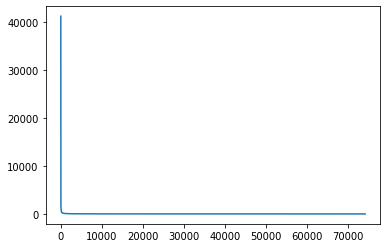

In [ ]:
plt.plot(sorted(words_count.values(), reverse=True)) #按照顺序的描点画图

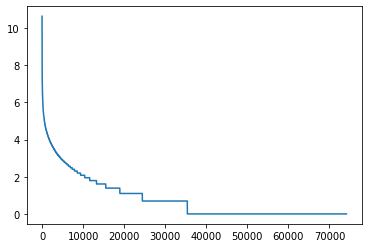

In [ ]:
plt.plot(list(map(lambda n:np.log(n),sorted(words_count.values(),reverse=True))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


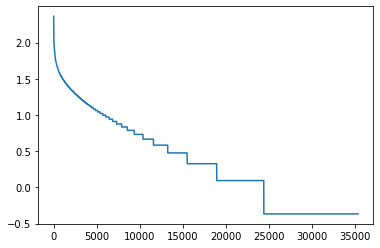

In [ ]:
plt.plot(list(map(lambda n:np.log(np.log(n)),sorted(words_count.values(),reverse=True))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


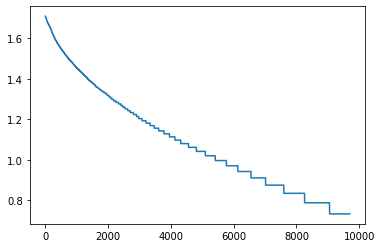

In [ ]:
plt.plot(list(map(lambda n:np.log(np.log(n)),sorted(words_count.values(),reverse=True)))[300:10000])

In [ ]:
sorted(words_count.items(),key=lambda kv:kv[1],reverse=True)[:100]

[('，', 41166),
 ('？', 27532),
 ('的', 25680),
 ('！', 11090),
 ('：', 9080),
 ('了', 7963),
 ('是', 6868),
 ('“', 6602),
 ('”', 6509),
 ('你', 5739),
 ('有', 4826),
 ('在', 4734),
 ('吗', 4362),
 ('什么', 3601),
 ('中国', 3472),
 ('为什么', 3299),
 ('如何', 3166),
 ('和', 2937),
 ('都', 2889),
 ('人', 2661),
 ('怎么', 2587),
 ('不', 2553),
 ('《', 2552),
 ('》', 2537),
 ('被', 2524),
 ('、', 2192),
 ('会', 2084),
 ('我', 2068),
 ('对', 2042),
 ('美国', 2040),
 ('年', 1886),
 ('上', 1783),
 ('最', 1724),
 ('看', 1717),
 ('能', 1692),
 ('这', 1690),
 ('—', 1679),
 ('好', 1529),
 ('要', 1527),
 ('一个', 1516),
 ('将', 1513),
 ('还', 1504),
 ('后', 1494),
 ('就', 1481),
 ('大', 1480),
 ('与', 1450),
 ('中', 1409),
 ('哪些', 1398),
 ('让', 1381),
 ('他', 1252),
 ('5', 1250),
 ('去', 1181),
 ('世界', 1179),
 ('2018', 1171),
 ('却', 1162),
 ('月', 1153),
 ('新', 1150),
 ('谁', 1149),
 ('到', 1140),
 ('可以', 1121),
 ('又', 1107),
 ('多', 1082),
 ('说', 1077),
 ('也', 1067),
 ('个', 1046),
 ('网友', 1038),
 ('来', 1019),
 ('上联', 1009),
 ('如果', 1006),
 ('做', 986),


## Build Baseline - TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from icecream import ic

In [ ]:
content = train_data['words_keep'].values

In [ ]:
content

array(['上课时 学生 手机 响个 不停 ， 老师 一怒之下 把 手机 摔 了 ， 家长 拿 发票 让 老师 赔 ，',
       '商赢 环球 股份 有限公司 关于 延期 回复 上海证券交易所 对 公司 2017 年 年度报告 的 事后 审核 问询 函 的 公告',
       '通过 中介 公司 买 了 二手房 ， 首付 都 付 了 ， 现在 卖家 不想 卖 了 。 怎么 处理', ...,
       '公婆 花 80 万给 我 装修 新婚 房 ， 说 是 村里 最 豪华 的 ， 你们 觉得 呢 ？',
       'OPPO Find X 曝光 ， 屏下 指纹 ， 支持 5G ， 骁龙 855 性能 终结者 ！',
       '日本 虎视眈眈 “ 武力 夺岛 ” , 美军 向 俄 后院 开火 ， 普京 终 不再 忍 ！'], dtype=object)

In [ ]:
STOP_WORDS_SIZE = 300

In [ ]:
stop_words = [w for w,_ in sorted(words_count.items(),key=lambda kv:kv[1],reverse=True)[:STOP_WORDS_SIZE]]

In [ ]:
stop_words

['，',
 '？',
 '的',
 '！',
 '：',
 '了',
 '是',
 '“',
 '”',
 '你',
 '有',
 '在',
 '吗',
 '什么',
 '中国',
 '为什么',
 '如何',
 '和',
 '都',
 '人',
 '怎么',
 '不',
 '《',
 '》',
 '被',
 '、',
 '会',
 '我',
 '对',
 '美国',
 '年',
 '上',
 '最',
 '看',
 '能',
 '这',
 '—',
 '好',
 '要',
 '一个',
 '将',
 '还',
 '后',
 '就',
 '大',
 '与',
 '中',
 '哪些',
 '让',
 '他',
 '5',
 '去',
 '世界',
 '2018',
 '却',
 '月',
 '新',
 '谁',
 '到',
 '可以',
 '又',
 '多',
 '说',
 '也',
 '个',
 '网友',
 '来',
 '上联',
 '如果',
 '做',
 '还是',
 '用',
 '下联',
 '日本',
 '手机',
 '没有',
 '万',
 '现在',
 '为',
 '农村',
 '为何',
 '买',
 '「',
 '」',
 '…',
 '给',
 '这个',
 '3',
 '把',
 '-',
 '岁',
 '怎样',
 '呢',
 '一',
 '10',
 '｜',
 '国家',
 '多少',
 '很',
 '到底',
 '哪个',
 '（',
 '知道',
 '）',
 '她',
 '俄罗斯',
 '更',
 '4',
 '想',
 '真的',
 '小',
 '我们',
 '游戏',
 '日',
 '这些',
 '下',
 '过',
 '自己',
 '里',
 '怎么样',
 '2',
 '钱',
 '从',
 '城市',
 '未来',
 '1',
 '这么',
 '亿',
 '王者',
 '成为',
 '汽车',
 '打',
 '孩子',
 '公司',
 '吃',
 '没',
 '发展',
 '看待',
 '荣耀',
 '8',
 '活动',
 '伊朗',
 '车',
 '再',
 '6',
 '时',
 '该',
 '比',
 '着',
 '以色列',
 '旅游',
 '第一',
 '出',
 '高',
 '才',
 '不是',
 '这样

In [ ]:
WORDS_LONG_TAIL_BEGIN = 10000
WORDS_SIZE = WORDS_LONG_TAIL_BEGIN - STOP_WORDS_SIZE

In [ ]:
tfidf = TfidfVectorizer(max_features=WORDS_SIZE, stop_words=stop_words)

In [ ]:
text_vectors = tfidf.fit_transform(content)

In [ ]:
text_vectors.shape

(63360, 9700)

In [ ]:
targets = train_data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(text_vectors, targets, test_size=0.2, random_state=2021)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
accuracy = accuracy_score(rf.predict(x_test), y_test)
ic(accuracy)

ic| accuracy: 0.4852430555555556


0.4852430555555556

In [ ]:
recall = recall_score(rf.predict(x_test), y_test, average='macro')
ic(recall)

ic| recall: 0.47054577991703456


0.47054577991703456

In [ ]:
recall = recall_score(rf.predict(x_test), y_test, average='micro')
ic(recall)

ic| recall: 0.4852430555555556


0.4852430555555556